# Unit 5 - Financial Planning


In [1]:
# Initial imports
!pip install alpaca_trade_api
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $22313.03
The current value of your 5.3 ETH is $2861.84


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
from datetime import datetime
startdate = datetime.now()
start_date = pd.Timestamp("2020-11-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-19", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Preview DataFrame
df_investments.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-11-19 00:00:00-05:00  118.08  118.26  118.03  118.18  5807639  355.61   

                                                             
                             high     low   close    volume  
time                                                         
2020-11-19 00:00:00-05:00  358.18  354.15  357.76  47610697

In [9]:
# Pick AGG and SPY close prices
agg_close_price =  df_investments['AGG']["close"][0]
spy_close_price =  df_investments['SPY']["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.18
Current SPY closing price: $357.76


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17888.00
The current value of your 200 AGG shares is $23636.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
savings = [my_btc_value+my_eth_value, my_spy_value+my_agg_value]
# Display savings DataFrame
df_savings = pd.DataFrame(savings, columns=['amount'], index=['crypto','shares'])
display(df_savings)


amount
crypto  25174.869
shares  41524.000

<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

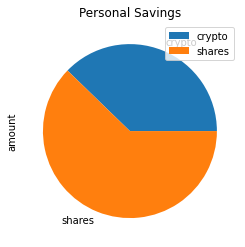

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',title='Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
# Validate saving health
if total_savings > emergency_fund:
    print("You're responsible!")
elif total_savings == emergency_fund:
    print("You have exactly 3 months saved up")
else:
    print("You need "+str(emergency_fund-total_savings)+" to save more!")

You're responsible!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2         3          4         5         6    \
0      1.000000   1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   
1      1.009548   1.003725  1.004182  1.007894   1.006420  1.004618  1.007771   
2      0.999106   1.002235  1.004661  0.991815   1.015437  1.018498  1.012816   
3      1.017988   0.998553  1.007406  1.008493   1.001528  1.022543  1.006211   
4      1.023232   1.002728  1.011675  1.003700   1.003695  1.018796  1.016782   
...         ...        ...       ...       ...        ...       ...       ...   
7556  11.949675  17.653995  2.573299  6.498464  42.801498  3.832400  3.070342   
7557  11.953649  17.533976  2.571844  6.565208  42.503400  3.832172  3.026922   
7558  11.936544  17.527772  2.558930  6.589076  42.578381  3.802973  3.056778   
7559  12.062337  17.487111  2.557528  6.641929  43.055654  3.789497  3.055618   
7560  12.086414  17.538199  2.547356  6.668956  42.899773  3.744964  3.025211   

            7         8         9    ...       490        491       492  \
0      1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1      0.993832  0.996187  0.990807  ...  0.999841   0.990342  1.003203   
2      1.001365  0.994478  1.011840  ...  1.002536   0.991575  1.011173   
3      0.984728  0.998516  1.002227  ...  1.013777   0.978211  1.000846   
4      0.994131  0.983531  0.994599  ...  1.010597   0.979864  0.996972   
...         ...       ...       ...  ...       ...        ...       ...   
7556  18.973955  2.441137  4.062905  ...  7.448981  10.387962  8.077132   
7557  18.855874  2.436492  4.068069  ...  7.427052  10.396724  7.988914   
7558  18.658970  2.444644  4.004767  ...  7.477294  10.315805  7.989978   
7559  18.638060  2.434292  4.006950  ...  7.514646  10.380333  7.905687   
7560  18.575653  2.459425  4.032928  ...  7.593888  10.242876  7.847991   

            493        494        495        496        497        498  \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      1.015501   1.012280   0.998641   1.003587   0.998534   0.999602   
2      1.027219   0.999904   0.998300   1.006695   1.002278   0.992857   
3      1.030240   0.995054   1.003850   1.016501   1.003862   1.000604   
4      1.031517   0.985652   1.001508   1.004743   1.007338   0.998632   
...         ...        ...        ...        ...        ...        ...   
7556  13.032579  11.393437  20.555779  16.865941  14.108309  25.133413   
7557  13.048314  11.464179  20.418283  16.743017  14.118348  25.331225   
7558  13.043761  11.510368  20.411333  16.888384  14.186613  25.275746   
7559  12.966886  11.582935  20.372780  16.951615  14.394195  25.375076   
7560  12.784506  11.399890  20.372778  16.884410  14.367945  25.077922   

            499  
0      1.000000  
1      1.004721  
2      1.005962  
3      0.996927  
4      0.988471  
...         ...  
7556  26.992477  
7557  26.977672  
7558  27.014418  
7559  26.746534  
7560  26.366480  

[7561 rows x 500 columns]

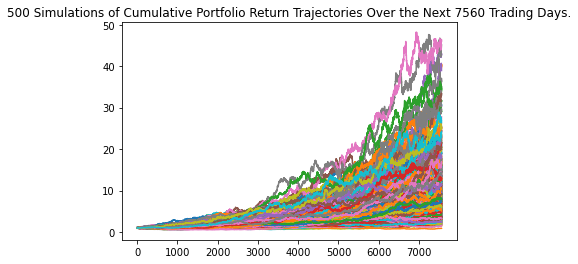

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

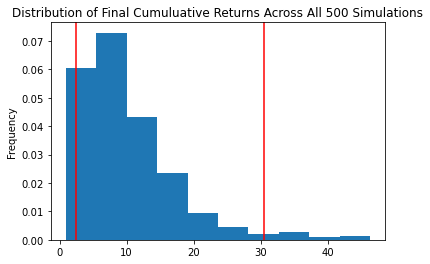

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean             10.112590
std               7.155714
min               0.930685
25%               5.220550
50%               8.089528
75%              13.076136
max              46.230821
95% CI Lower      2.380528
95% CI Upper     30.436934
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47610.55 and $608738.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71415.83 and $913108.03


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.005196  1.000819  1.001479  1.010630  0.999074  1.000195  0.985973   
2     1.011092  1.004859  0.996240  1.005963  0.996897  0.978810  0.981844   
3     1.015964  1.004612  1.001955  1.009080  0.993585  0.982417  0.972263   
4     1.012402  1.010081  0.992125  1.002288  0.994367  0.995390  0.970531   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.661188  1.877990  0.850893  1.740582  0.991496  1.022994  1.518699   
1257  1.673868  1.892320  0.859479  1.748117  1.007756  1.037075  1.512788   
1258  1.676130  1.886063  0.869498  1.750425  1.013735  1.045672  1.513335   
1259  1.681960  1.872711  0.868141  1.743236  1.012824  1.028905  1.502676   
1260  1.691981  1.887344  0.875779  1.735759  0.994466  1.028869  1.524079   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.997836  1.003862  1.001131  ...  0.991766  0.996341  1.003934   
2     0.982697  0.985559  1.004788  ...  1.013532  0.992862  1.016387   
3     0.983077  1.003183  1.009357  ...  1.017822  0.994698  1.015439   
4     0.981435  1.003467  1.011237  ...  1.013885  0.990985  1.028799   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.032176  2.201913  1.230490  ...  1.607031  1.530761  1.486583   
1257  2.034963  2.216192  1.241830  ...  1.613982  1.553798  1.493256   
1258  2.058190  2.230242  1.227870  ...  1.607445  1.575436  1.499312   
1259  2.075062  2.209481  1.199479  ...  1.580663  1.576063  1.499833   
1260  2.071426  2.190662  1.196478  ...  1.576002  1.593742  1.508459   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.011715  1.000296  1.000629  0.992438  0.991829  0.982528  0.991462  
2     1.010421  1.018039  1.007497  1.000569  1.010636  0.983355  0.983323  
3     1.012798  1.006763  1.017106  0.986353  1.020553  0.986053  0.988251  
4     1.000967  1.008459  1.014575  0.997520  1.022821  0.988561  0.983775  
...        ...       ...       ...       ...       ...       ...       ...  
1256  0.948881  1.039498  1.398944  1.343255  1.579684  1.172626  0.978389  
1257  0.962492  1.039275  1.402943  1.344372  1.589117  1.182577  0.984912  
1258  0.959567  1.041773  1.395643  1.347283  1.578356  1.191914  0.994188  
1259  0.967544  1.047112  1.390578  1.346609  1.563129  1.193496  0.991781  
1260  0.958472  1.050230  1.379119  1.348288  1.543885  1.206557  0.986275  

[1261 rows x 500 columns]

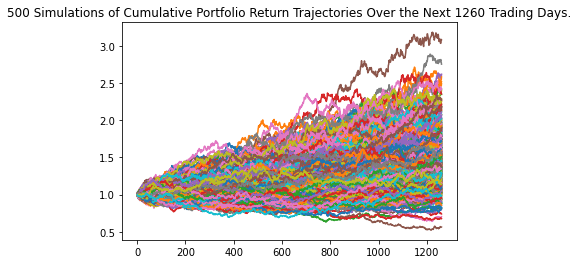

In [26]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

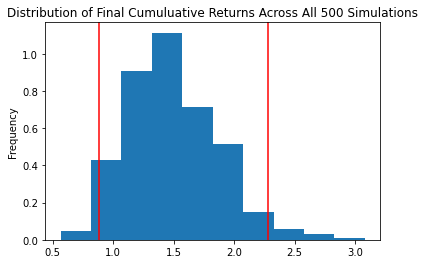

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              1.487252
std               0.372900
min               0.564501
25%               1.207597
50%               1.447960
75%               1.740661
max               3.080119
95% CI Lower      0.880036
95% CI Upper      2.283207
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17600.73 and $45664.13


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.004524  1.003573  1.012930  0.996057  0.988029  0.999646  0.995585   
2     1.002033  1.001785  1.018571  1.004704  0.992151  1.005563  0.999138   
3     0.997523  1.011207  1.017769  1.017873  0.986655  1.015107  1.003724   
4     1.002819  1.015625  1.012695  1.020099  0.988303  1.012947  1.012435   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.047539  1.515830  3.030767  1.474997  1.716246  1.540709  1.199959   
2517  1.049173  1.516554  3.046997  1.477502  1.710808  1.536347  1.205692   
2518  1.046150  1.529798  3.030154  1.488384  1.712626  1.560267  1.213212   
2519  1.048447  1.528322  3.032614  1.502229  1.721809  1.559669  1.217878   
2520  1.062860  1.537335  3.079456  1.504236  1.733964  1.566135  1.215604   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.015451  1.003794  1.000859  ...  0.997365  1.002323  0.993912   
2     1.022377  1.013775  1.001345  ...  0.989840  1.005906  0.997991   
3     1.040054  1.012351  0.999677  ...  0.992108  1.013298  1.000807   
4     1.027057  1.019313  1.003774  ...  1.001849  1.017335  1.005551   
...        ...       ...       ...  ...       ...       ...       ...   
2516  2.620528  1.585110  2.572132  ...  3.583506  1.659333  1.677758   
2517  2.646983  1.596283  2.577398  ...  3.579037  1.663039  1.679776   
2518  2.662841  1.616913  2.534899  ...  3.577073  1.652309  1.678455   
2519  2.659479  1.615763  2.563838  ...  3.585730  1.642746  1.678155   
2520  2.628826  1.594404  2.550600  ...  3.555902  1.627994  1.688083   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.001152  1.009410  0.988423  1.005982  0.998772  1.002365  1.011874  
2     1.004791  1.020118  0.986445  1.016378  1.005257  1.004098  1.020001  
3     0.999058  1.015117  0.997758  1.016349  0.993593  1.008268  1.033650  
4     0.987575  1.013379  0.996573  1.019069  0.990171  1.004109  1.033466  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.207143  1.748738  2.851063  1.495563  2.207286  1.808487  2.441990  
2517  1.221942  1.746496  2.831799  1.498707  2.182471  1.810170  2.443998  
2518  1.218596  1.727428  2.834874  1.495323  2.205336  1.816822  2.427519  
2519  1.219480  1.722103  2.811565  1.459250  2.209218  1.823329  2.393720  
2520  1.212038  1.745075  2.803955  1.473166  2.234810  1.822170  2.383491  

[2521 rows x 500 columns]

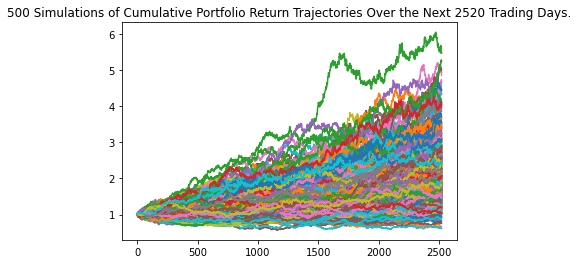

In [32]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

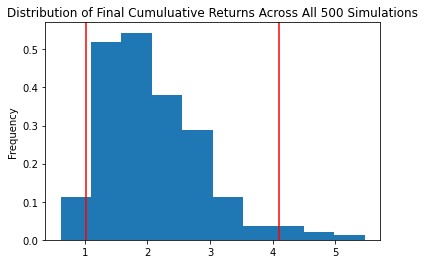

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()
# Print summary statistics
print(tbl)

count           500.000000
mean              2.077590
std               0.804607
min               0.615715
25%               1.495593
50%               1.896147
75%               2.538083
max               5.470964
95% CI Lower      1.025013
95% CI Upper      4.102224
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[-2] * initial_investment,2)
ci_upper = round(tbl[-1] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20500.26 and $82044.49
